In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import arsenal.profiling
from collections import deque
from arsenal import timers

from transduction.lazy import Lazy
from transduction.fsa import FSA, EPSILON
from transduction import (
    FST, EPSILON, PrecoverDecomp, examples, Precover,    
)
from time import time
from collections import Counter
from transduction.util import display_table
from transduction.goo import LazyPrecoverNFA, LazyPrecoverNFA_slower, NonrecursiveDFADecomp, Token, bpe_wfst

In [3]:
from genlm.backend.tokenization.bytes import get_byte_vocab
from transformers import AutoTokenizer

In [4]:
from transduction import examples
fst = examples.samuel_example()
target = 'c'
decomp = NonrecursiveDFADecomp(fst, target)

1
made the index_iy_xj
made the index_i_xj
made the index_ix_j
made the index_ixy_j
2
3
pop
pop
final
universal


In [5]:
decomp.quotient.min()

In [6]:
decomp.remainder.min()

{
}

In [7]:
precover = Precover(fst, target)
precover.show_decomposition()

/home/timv/projects/transduction/transduction/lazy.py:15: UserWarning: using slow implementation of arcs_x
  import warnings; warnings.warn('using slow implementation of arcs_x')


quotient,remainder
"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start <!-- 0 --> 0 2 <!-- start->0 --> start->0 <!-- 1 --> 1 0 <!-- 0->1 --> 0->1 a",∅


In [8]:
assert precover.min.equal(decomp.dfa.materialize())

In [9]:
tok = AutoTokenizer.from_pretrained("gpt2")
decode = get_byte_vocab(tok)
#fst = build_realpha(tok)

In [10]:
fst = bpe_wfst(tok).renumber

dropped (50256, b'<|endoftext|>')


In [11]:
target = (b't', b'h', b'e')

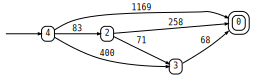

In [12]:
the = fst.renumber(None, FST.from_string(target).renumber).trim().epsremove().trim().min()
the

In [13]:
#list(the.language())

In [14]:
P = LazyPrecoverNFA(fst, target).materialize()

made the index_iy_xj
made the index_i_xj
made the index_ix_j
made the index_ixy_j


In [15]:
len(P.states)

98030

In [16]:
target = tuple(bytes([x]) for x in b'Timothy')

In [17]:
from arsenal import timeit
with timeit(''):
    P = LazyPrecoverNFA(fst, target).materialize()

index_iy_xj available
index_i_xj available
index_ix_j available
index_ixy_j available


 (0.8651 sec)


In [18]:
len(P.states)

98048

In [19]:
# i = 0
# for x in P.language():
#     print(x)
#     i += 1
#     if i > 15: break

In [28]:
T = timers()
for _ in range(3):
    
    with T['fast']:
        fast = LazyPrecoverNFA(fst, target).materialize()#.renumber().trim().epsremove().trim()
    with T['slow']:
        slow = LazyPrecoverNFA_slower(fst, target).materialize()#.renumber().trim().epsremove().trim()

T.compare()

index_iy_xj available
index_i_xj available
index_ix_j available
index_ixy_j available
index_iy_xj available
index_i_xj available
index_ix_j available
index_ixy_j available
index_iy_xj available
index_i_xj available
index_ix_j available
index_ixy_j available
fast is 1.2230x faster than slow (p=0.10000, median: slow: 0.438547, fast: 0.358592)


In [29]:
len(fast.states), len(slow.states)

(98048, 98048)

index_iy_xj available
index_i_xj available
index_ix_j available
index_ixy_j available
wrote: /tmp/out.prof (use `gprof-viz` to view)


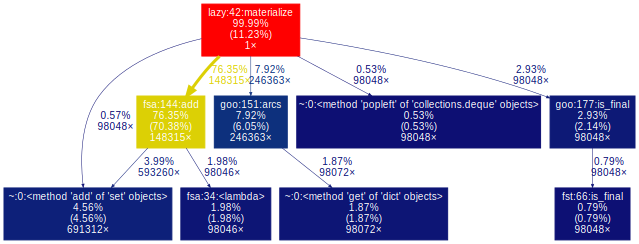

In [30]:
p = arsenal.profiling.profiler()
with p:
    precover = LazyPrecoverNFA(fst, target).materialize()
p.graphviz()

In [31]:
precover = precover.renumber()

In [32]:
len(precover.states)

98048

In [33]:
# p = arsenal.profiling.profiler()
# with p:
#     self = precover.lazy().epsremove()#.materialize()

#     #m = FSA()
#     worklist = deque()
#     visited = set()
#     dups = Counter()
#     popped = set()

#     last_update = time()
#     for i in self.start():
#         worklist.append(i)
#         visited.add(i)
#         #m.add_start(i)
#     while worklist:
#         i = worklist.popleft()
#         assert i not in popped
#         popped.add(i)
#         if self.is_final(i):
#             #m.add_stop(i)
#             pass
#         for a, j in self.arcs(i):
#             if j not in visited:
#                 visited.add(j)
#                 worklist.append(j)
#                 dups[j] += 1
#             #m.add(i,a,j)
#         now = time()
#         if now - last_update > 1:
#             print(len(visited), len(popped))
#             last_update = now
#         if len(popped) == len(precover.states):   # visited every state... why are we still spinning?
#             break

In [39]:
p = arsenal.profiling.profiler()
with p:
    decomp = NonrecursiveDFADecomp(fst, target)

[autoreload of transduction.lazy failed: Traceback (most recent call last):
  File "/home/timv/.local/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/timv/.local/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/home/timv/.local/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/home/timv/.local/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 365, in update_class
    update_instances(old, new)
  File "/home/timv/.local/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 319, in update_instances
    refs = gc.get_referrers(old)
KeyboardInterrupt
]


1
index_iy_xj available
index_i_xj available
index_ix_j available
index_ixy_j available
2
3
pop
pop
pop
pop
pop
pop
pop
final
wrote: /tmp/out.prof (use `gprof-viz` to view)


KeyboardInterrupt: 

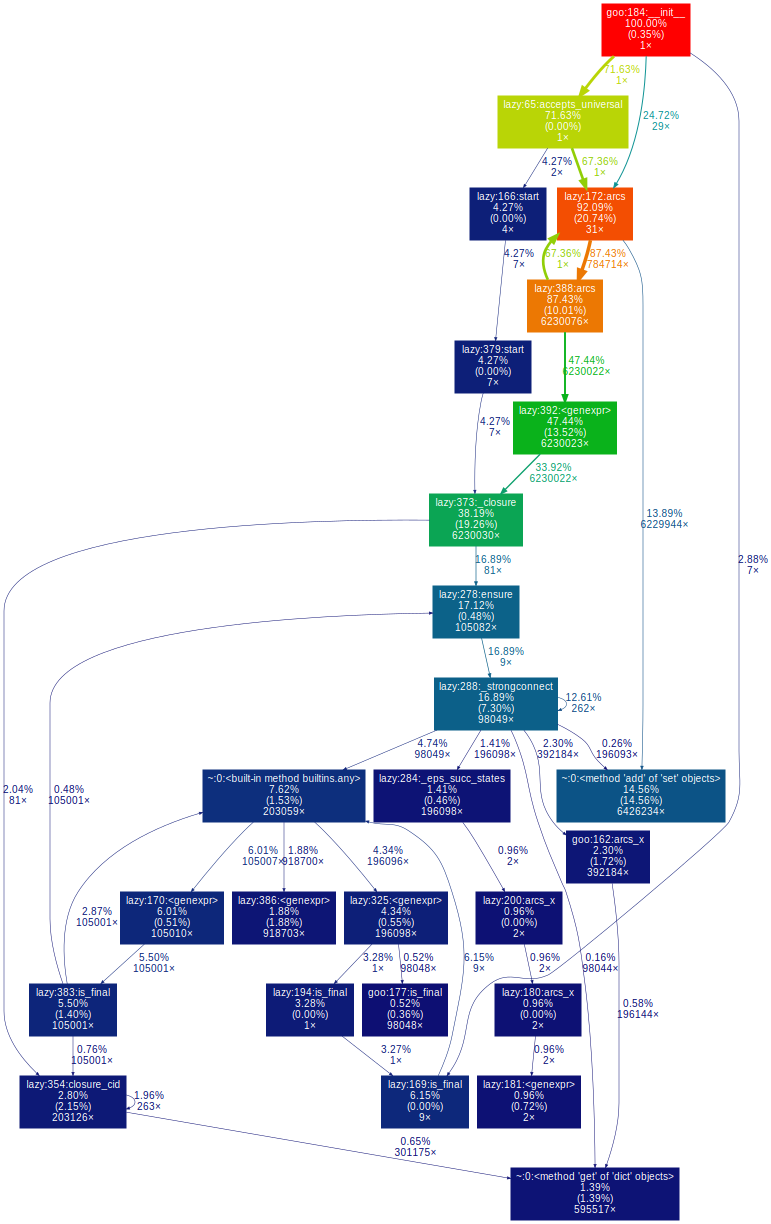

In [40]:
p.graphviz()

In [ ]:
#p.graphviz()

In [ ]:
#decomp.source_alphabet

In [ ]:
decomp.quotient

In [ ]:
decode[255], decode[48953]

In [ ]:
decomp.fsa.det().materialize()

In [ ]:
decomp.quotient.renumber().trim()

In [ ]:
decomp.remainder.renumber().trim()

In [ ]:
#from tokenization.deathrow.lm import load_model_by_name
from tokenization.statelm import StateLM

In [ ]:
#lm = load_model_by_name('gpt2')
lm = StateLM.initial('gpt2')

In [ ]:
from transduction.enumeration import prioritized_enumeration

In [ ]:
pe = prioritized_enumeration(lm, fst, target, max_steps=20)

In [ ]:
len(pe.remainder_terms)

In [ ]:
len(pe.quotient_terms)

In [ ]:
pe.quotient_terms[0].source

In [ ]:
from transduction.enumeration import importance_sampling

In [ ]:
sampler = importance_sampling(lm, fst, target)

In [ ]:
sampler.sample()